<a href="https://colab.research.google.com/github/pavansai26/sentiment-analysis/blob/master/sentimaent_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
import nltk
import fastai
from fastai import *
from fastai.text import *
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS


In [3]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
data=pd.read_csv('/gdrive/My Drive/Tweets.csv')

In [5]:
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [6]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [7]:
data.keys()

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [8]:
data.shape

(14640, 15)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


In [10]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [0]:
sns.heatmap(data.isnull(),annot=True,cmap='RdYlGn',cbar=True)

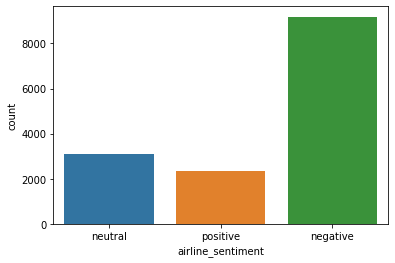

In [12]:
sns.countplot(data['airline_sentiment'])

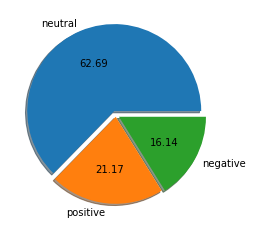

In [13]:
plt.pie(data['airline_sentiment'].value_counts(),explode=[0.05,0.02,0.04],shadow=True,labels=['neutral','positive','negative'],autopct='%.2f');

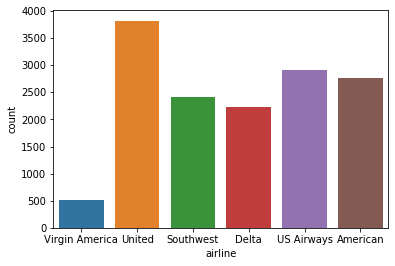

In [14]:
sns.countplot(data['airline'])

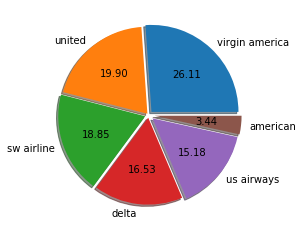

In [15]:
plt.pie(data['airline'].value_counts(),explode=[0.05,0.02,0.04,0.03,0.06,0.07],shadow=True,labels=['virgin america','united','sw airline','delta','us airways','american'],autopct='%.2f');

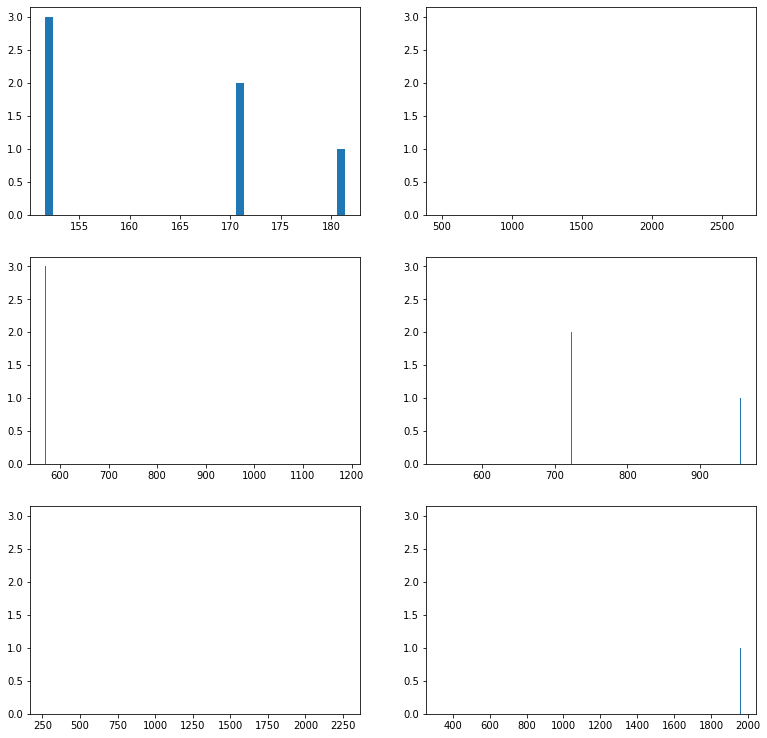

In [16]:
def sentiment(airline):
  new=data[data['airline']==airline]
  count=new['airline_sentiment'].value_counts()
  index=[1,2,3]
  plt.figure(1,figsize=(13,13))
  plt.bar(count,index)
  #plt.xticks(index,['negative','neutral','positive'])
airlinename=data['airline'].unique()
plt.figure(1,figsize=(13,13))
for i in range(6):
  plt.subplot(3,2,i+1)
  sentiment(airlinename[i])


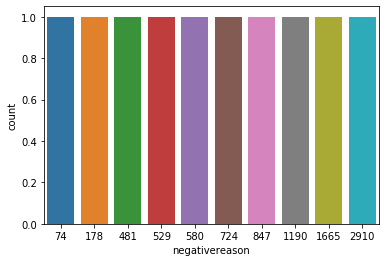

In [0]:
sns.countplot(data['negativereason'].value_counts());

In [0]:
data['negativereason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

In [0]:
airsentiment=pd.crosstab(data['airline'],data['airline_sentiment'])
airsentiment

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


In [0]:
percentage=airsentiment.apply(lambda a: a/a.sum()*100,axis=1)

In [0]:
percentage

airline_sentiment,negative,neutral,positive
airline,,,
American,71.040232,16.781443,12.178325
Delta,42.979298,32.538254,24.482448
Southwest,49.008264,27.438017,23.553719
US Airways,77.686234,13.079300,9.234466
United,68.890633,18.236525,12.872841
Virgin America,35.912698,33.928571,30.158730


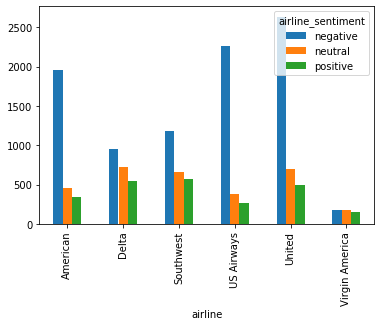

In [0]:
pd.crosstab(index=data['airline'],columns=data['airline_sentiment']).plot(kind='bar')

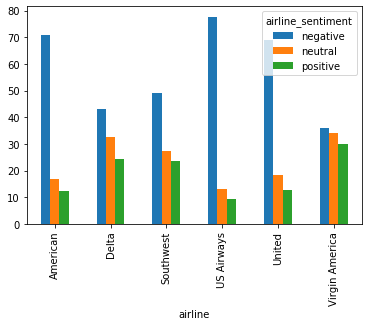

In [0]:
percentage.plot(kind='bar')

In [0]:
import datetime
data['tweet_created']=pd.to_datetime(data['tweet_created'])
data['date_created']=data['tweet_created'].dt.date

In [0]:
data['date_created']

0        2015-02-24
1        2015-02-24
2        2015-02-24
3        2015-02-24
4        2015-02-24
            ...    
14635    2015-02-22
14636    2015-02-22
14637    2015-02-22
14638    2015-02-22
14639    2015-02-22
Name: date_created, Length: 14640, dtype: object

In [0]:
data1=data.groupby(['date_created','airline'])
data1=data1.airline_sentiment.value_counts()
data1.unstack()

airline_sentiment            negative  neutral  positive
date_created airline                                    
2015-02-16   Delta                1.0      1.0       NaN
             United               2.0      NaN       NaN
2015-02-17   Delta              108.0     86.0      69.0
             Southwest          213.0     85.0      86.0
             US Airways         233.0     30.0      48.0
             United             272.0     75.0      49.0
             Virgin America      12.0     21.0      21.0
2015-02-18   American             1.0      NaN       NaN
             Delta              105.0     86.0      77.0
             Southwest          110.0    106.0      76.0
             US Airways         244.0     32.0      41.0
             United             257.0     90.0      59.0
             Virgin America      19.0     21.0      20.0
2015-02-19   American             NaN      NaN       1.0
             Delta              135.0     70.0      78.0
             Southwest          127.0     94.0      96.0
             US Airways         193.0     54.0      32.0
             United             272.0     85.0      69.0
             Virgin America      24.0     26.0      20.0
2015-02-20   American             1.0      NaN       NaN
             Delta               91.0     90.0      70.0
             Southwest          132.0    110.0      77.0
             US Airways         248.0     52.0      33.0
             United             342.0     99.0      85.0
             Virgin America      21.0     32.0      17.0
2015-02-21   American             1.0      NaN       NaN
             Delta               98.0     79.0      66.0
             Southwest          257.0     60.0      53.0
             US Airways         291.0     39.0      30.0
             United             365.0     88.0      53.0
             Virgin America      37.0     12.0      28.0
2015-02-22   American           762.0    132.0      94.0
             Delta              255.0     76.0      77.0
             Southwest          129.0     77.0      73.0
             US Airways         561.0     60.0      27.0
             United             532.0    102.0      69.0
             Virgin America      27.0     16.0      10.0
2015-02-23   American           826.0    178.0     137.0
             Delta              125.0    195.0      71.0
             Southwest          116.0     83.0      77.0
             US Airways         372.0     74.0      42.0
             United             449.0    109.0      83.0
             Virgin America      31.0     37.0      23.0
2015-02-24   American           369.0    153.0     104.0
             Delta               37.0     40.0      36.0
             Southwest          102.0     49.0      32.0
             US Airways         121.0     40.0      16.0
             United             142.0     49.0      25.0
             Virgin America      10.0      6.0      13.0

In [0]:
data2=data[data['airline_sentiment']=='positive']
words=' '.join(data2['text'])

In [20]:
words

'@VirginAmerica plus you\'ve added commercials to the experience... tacky. @VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :) @virginamerica Well, I didn\'t…but NOW I DO! :-D @VirginAmerica it was amazing, and arrived an hour early. You\'re too good to me. @VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D @VirginAmerica This is such a great deal! Already thinking about my 2nd trip to @Australia &amp; I haven\'t even gone on my 1st trip yet! ;p @VirginAmerica @virginmedia I\'m flying your #fabulous #Seductive skies again! U take all the #stress away from travel http://t.co/ahlXHhKiyn @VirginAmerica Thanks! @VirginAmerica So excited for my first cross country flight LAX to MCO I\'ve heard nothing but great things about Virgin America. #29DaysToGo I ❤️ flying @VirginAmerica. ☺️👍 @VirginAmerica you know what would be amazingly awesome? BOS-FLL PLEASE!!!!!!! I want to fly with only you. @VirginAmerica I love this graphic. http:/

In [0]:
clean_word=' '.join([word for word in words.split() if 'http' not in word and not word.startswith('@') and word !='RT'])

In [22]:
clean_word

'plus you\'ve added commercials to the experience... tacky. yes, nearly every time I fly VX this “ear worm” won’t go away :) Well, I didn\'t…but NOW I DO! :-D it was amazing, and arrived an hour early. You\'re too good to me. I &lt;3 pretty graphics. so much better than minimal iconography. :D This is such a great deal! Already thinking about my 2nd trip to &amp; I haven\'t even gone on my 1st trip yet! ;p I\'m flying your #fabulous #Seductive skies again! U take all the #stress away from travel Thanks! So excited for my first cross country flight LAX to MCO I\'ve heard nothing but great things about Virgin America. #29DaysToGo I ❤️ flying ☺️👍 you know what would be amazingly awesome? BOS-FLL PLEASE!!!!!!! I want to fly with only you. I love this graphic. I love the hipster innovation. You are a feel good brand. this is great news! America could start flights to Hawaii by end of year via Moodlighting is the only way to fly! Best experience EVER! Cool and calming. 💜✈ #MoodlitMonday Done

In [0]:
wordcloud=WordCloud(stopwords=STOPWORDS,width=2000,height=2500).generate(clean_word)

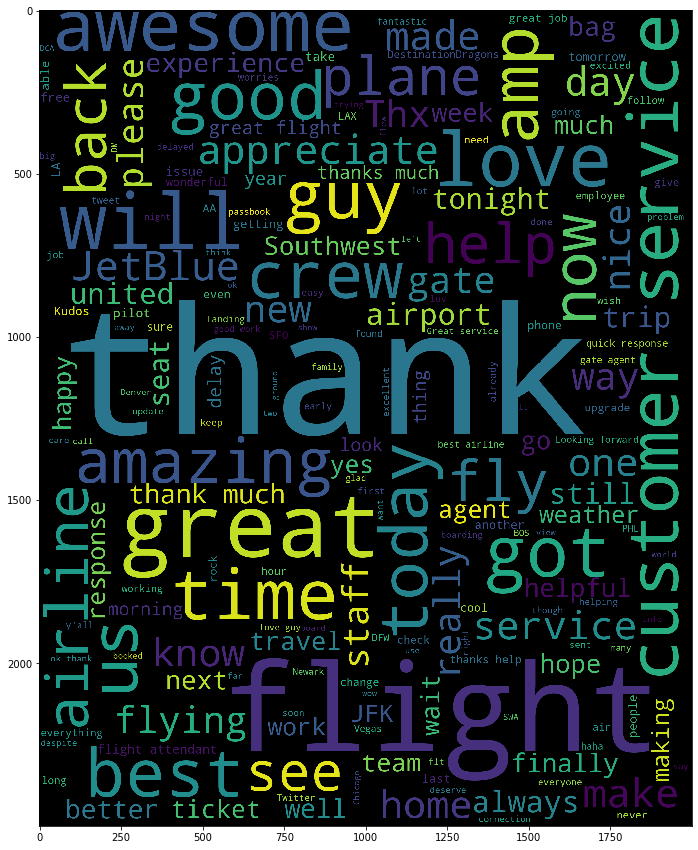

In [24]:
plt.figure(1,figsize=(15,15))
plt.imshow(wordcloud)
plt.show()

In [0]:
data3=data[data['airline_sentiment']=='neutral']
words=' '.join(data3['text'])

In [0]:
clean_word=' '.join([word for word in words.split() if 'http' not in word and not word.startswith('@') and word !='RT'])

In [0]:
wordcloud=WordCloud(stopwords=STOPWORDS,width=2000,height=2500).generate(clean_word)

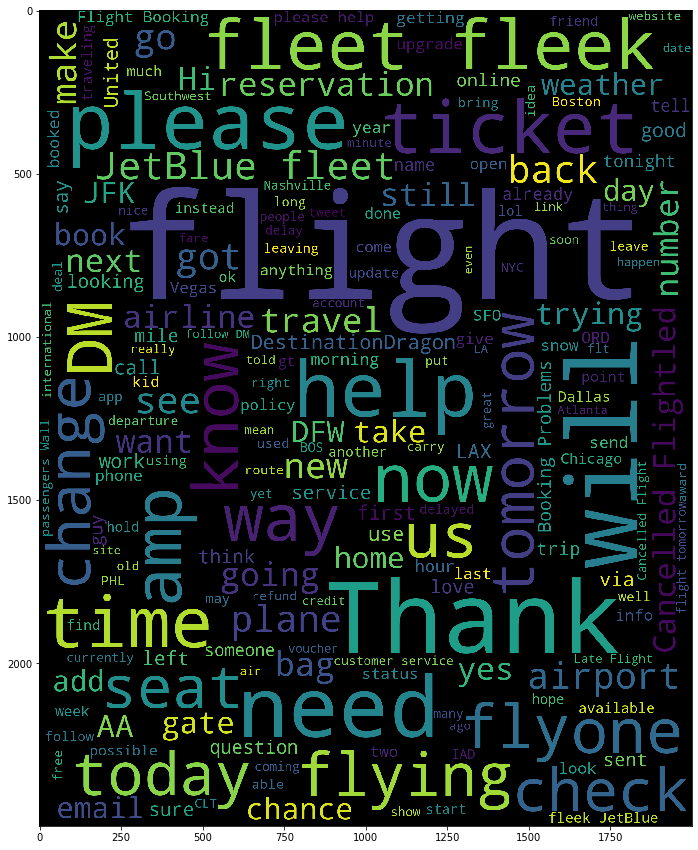

In [28]:
plt.figure(1,figsize=(15,15))
plt.imshow(wordcloud)
plt.show()

In [29]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
def to_words(textdata):
  letters=re.sub('[^a-zA-Z]',' ',textdata)
  word=letters.lower().split()
  stopword=stopwords.words('english')
  usefulwords=[w for w in word if not w in stopword]
  return(' '.join(usefulwords))


In [0]:
def lengthofwords(textdata):
  letters=re.sub('[^a-zA-Z]',' ',textdata)
  word=letters.lower().split()
  stopword=stopwords.words('english')
  usefulwords=[w for w in word if not w in stopword]
  return(len(usefulwords))

In [32]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 '

In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
a=le.fit(data['airline_sentiment'])

In [0]:
data['sentiment']=a.transform(data['airline_sentiment'])

In [35]:
data['sentiment'].sample(10)

1907     0
450      0
13781    0
9147     0
4144     0
9552     0
4099     0
467      2
511      0
9462     0
Name: sentiment, dtype: int64

In [36]:
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,tweet_length,sentiment
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),35,1
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),72,2
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),71,1
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),126,0
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN,63,2
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN,150,0
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN,60,1
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),135,0


In [0]:
data['clean_tweet']=data['text'].apply(lambda x: to_words(x))
data['tweet_length']=data['text'].apply(lambda x: lengthofwords(x) )
train,test=train_test_split(data,test_size=0.2)

In [0]:
train_clean_tweet=[]
for tweets in train['clean_tweet']:
  train_clean_tweet.append(tweets)
test_clean_tweet=[]
for tweets in test['clean_tweet']:
  test_clean_tweet.append(tweets)


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
vectorizer = TfidfVectorizer()
train_features= vectorizer.fit_transform(train_clean_tweet)
test_features=vectorizer.transform(test_clean_tweet)


In [0]:
dense_train=train_features.toarray()

In [0]:
dense_test=test_features.toarray()

In [0]:
test_percentage = 0.1
data.sort_index(inplace=True)
cutoff = int(test_percentage * data.shape[0])
data[['airline_sentiment', 'text']][:cutoff].to_csv('Tweets_filtered_test.csv', index=False, encoding='utf-8')
data[['airline_sentiment', 'text']][cutoff:].to_csv('Tweets_filtered_train.csv', index=False, encoding='utf-8')
data[['text']][cutoff:].to_csv('Tweets_text_only_train.csv', index=False, encoding='utf-8')

In [46]:
data = TextClasDataBunch.from_csv('.', 'Tweets_filtered_train.csv')
data.show_batch()

text,target
xxbos @united xxmaj hi have a question re future xxmaj flight xxmaj booking xxmaj problems . xxup dub - xxup jac 29 / 9 xxup jac - xxup lax 8 / 10 xxup lax - xxup dub 13 / 10 . i 'm * xxup g. xxmaj what is checked bag allowance for xxup jac - xxup lax ?,neutral
xxbos @united xxup where xxup is xxup my xxup fucking xxup bag ? ! ? ! xxmaj where the fuck is my fucking bag ? ? ? xxup tell xxup me xxup now xxup or xxup give xxup me a xxup number xxup to xxup call a xxup human . xxup san68059 m,negative
"xxbos @jetblue i ❤ ️ xxmaj jetblue but i was on flt xxunk from fll to sfo . xxunk off was over 1 hr xxmaj late xxmaj flight , div to phx & & got in 2 hrs xxmaj late xxmaj flight . xxmaj what will be done ?",negative
xxbos @americanair xxmaj took a flight yesterday xxunk xxup tpa - xxup dfw - xxup aus . xxmaj bag went to xxup iah . xxmaj today bag went to xxup iah - xxup dfw and then back to xxup iah . xxmaj still no bag !,negative
"xxbos .@americanair ( 2 / 3 ) ... i sat on the runway for 4 xxup more xxup hrs b4 takeoff ( 10 hrs xxmaj late xxmaj flight , xxunk xxup am ) . xxmaj pilot xxunk stated it was a comp / mech issue .",negative


In [47]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '.']

In [48]:
print(data.train_ds[0][0])
print(data.train_ds[1][0])
print(data.train_ds[2][0])

xxbos @southwestair extremely frustrating travel experience in xxmaj denver ! xxmaj instead of landing in xxup sea on xxmaj saturday , now it 's xxmaj monday afternoon !
xxbos @jetblue i am heading to xxup jfk now just on principle alone to deal w my lost & & damaged bag . # jetblue # xxunk # jfk # badservice # fail
xxbos @usairways where 's my apology ?


In [49]:
print(data.train_ds[0][0].data[:10])
print(data.train_ds[1][0].data[:10])
print(data.train_ds[2][0].data[:10])

[  2  29 868 538 192 226  30   5 518  13]
[   2   31   11  109 1612   10    6  221   61   64]
[  2  24 229  45  25 644  14]


In [0]:
bs = 24
seed = 333

In [51]:
data_lm = (TextList.from_csv('.', 'Tweets_text_only_train.csv')
            .random_split_by_pct(0.1, seed = seed)
           #We randomly split and keep 10% for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('data_lm.pkl')

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:215: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


In [52]:
data_lm.show_batch()

idx,text
0,xxmaj xxunk ( xxmaj australia ) to xxmaj bogota ( xxmaj xxunk ) tomorrow xxbos @united xxmaj hi . xxmaj my relative 's xxmaj flight xxmaj booking xxmaj problems number is xxup xxunk . xxmaj her name is xxmaj xxunk xxmaj xxunk xxmaj xxunk . xxmaj thank you xxbos @united it was delivered ! xxmaj thank you for making sure it arrived at my xxunk ! xxbos @united - rebooked
1,"good to know . xxbos @united okay . xxmaj thanks . xxbos @united xxmaj conference xxunk in 3 hours . xxmaj up all night due to delays and still waiting to talk to someone about lost luggage . xxbos @united xxmaj seat xxup xxunk , xxmaj flight xxup xxunk xxbos @united is it on a flight now ? xxmaj thanks for reply . xxbos @united is xxunk and i am"
2,"and the delay turns into a xxmaj cancelled xxmaj flight ... xxbos @united xxup ua xxunk delayed again - i get charged $ 600 if xxmaj late xxmaj flight by you - you say "" oh well "" xxbos @united we are trying to go as far away from king'scollegelondon as possible for # charity today . xxmaj would you help us ? # jailbreak # xxup rag xxbos @united"
3,"back to 1st class . xxmaj xxunk ? xxmaj really ? @united : xxunk xxmaj your xxunk is xxunk xxbos @united xxmaj thanks xxmaj yup i 'm all set . xxmaj it happens . xxup slc ground staff were prompt , helpful and courteous . xxbos xxmaj there were plenty of empty seats in coach "" @united : xxmaj your xxunk is understood . xxmaj crew members traveling for duty"
4,"when i boarded . xxbos “ @united : xxunk xxmaj sorry to hear about your flight . xxmaj do you need help reflight xxmaj booking xxmaj problems ? ” \n \n 👎 xxbos @united now we are trying to get to xxmaj san xxmaj juan from xxmaj chicago o'hare . xxmaj having lots of problems . xxmaj may get a standby flight . xxbos @united xxmaj alright , thank"


In [53]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [54]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


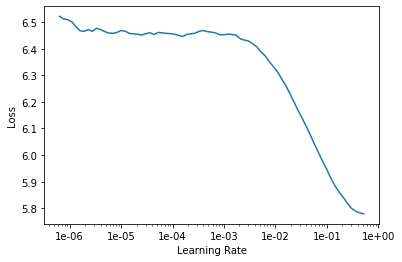

In [55]:
learn.recorder.plot(skip_end=15)

In [56]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.110430,3.807600,0.265655,00:42


In [0]:
learn.save('fit_head')

In [0]:
learn.unfreeze()

In [59]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.710329,3.667486,0.286875,00:51
1,3.589323,3.579241,0.297202,00:50
2,3.411657,3.524138,0.302292,00:50
3,3.130204,3.522621,0.303720,00:50
4,2.778100,3.594980,0.301548,00:50
5,2.396918,3.709380,0.297857,00:50
6,2.073043,3.830105,0.296458,00:50
7,1.837856,3.920900,0.293333,00:50
8,1.678416,3.983456,0.291012,00:50
9,1.602250,4.002830,0.290982,00:50


In [0]:
learn.save('fine_tuned')

In [0]:
learn.save_encoder('fine_tuned_enc')

In [62]:
data_clas = (TextList.from_csv('.', 'Tweets_filtered_train.csv', cols = 'text')               
             .random_split_by_pct(0.1, seed = seed)
             .label_from_df(cols=0)
             .databunch(bs=bs))
data_clas.save('data_clas.pkl')
data_clas.show_batch()

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:215: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


text,target
xxbos @united xxmaj hi have a question re future xxmaj flight xxmaj booking xxmaj problems . xxup xxunk - xxup jac 29 / 9 xxup jac - xxup lax 8 / 10 xxup lax - xxup xxunk 13 / 10 . i 'm * xxup xxunk xxmaj what is checked bag allowance for xxup jac - xxup lax ?,neutral
xxbos @americanair xxmaj hi . i have xxup koa - xxup lax - xxup phl - xxup ord booked as a 1-way xxunk xxunk . xxmaj if i called to xxunk it to xxup koa - xxup lax - xxup phx - xxup ord would i have to pay any fees,neutral
xxbos @usairways xxmaj my xxmaj flight xxmaj booking xxmaj problems xxup xxunk just times out when i select it under xxmaj manage xxmaj my xxmaj flight xxmaj booking xxmaj problems for months now . i have emailed but no response . xxmaj help ?,negative
"xxbos @united ( 2 / 2 ) xxmaj it xxunk that if ca n't confirm xxunk at time of xxmaj flight xxmaj booking xxmaj problems , i should assume that it may never clear . xxmaj did n't used to be that way",negative
xxbos @united xxmaj missed xxup xxunk flight due to ur xxmaj cancelled xxmaj flightlation . xxmaj xxunk supervisor disgusting . xxmaj now day xxmaj late xxmaj flight . xxmaj no apology or upgrade offer to xxup lhr from xxup ord ? ? ?,negative


In [63]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (11859 items)
x: TextList
xxbos @united the delay is due to customer service for 20 people ? xxmaj what about the xxup xxunk - xxup service you provided for 100 + ? # xxunk # xxunk,xxbos @united he is so excellent and so reliable :) # happycustomer,xxbos @united but again xxup united xxup xxunk xxup give 2 xxup xxunk xxup about xxup their xxup customers,xxbos @united xxmaj she is travelling from xxmaj xxunk ( xxmaj australia ) to xxmaj bogota ( xxmaj xxunk ) tomorrow,xxbos @united xxmaj hi . xxmaj my relative 's xxmaj flight xxmaj booking xxmaj problems number is xxup xxunk . xxmaj her name is xxmaj xxunk xxmaj xxunk xxmaj xxunk . xxmaj thank you
y: CategoryList
negative,positive,negative,neutral,neutral
Path: .;

Valid: LabelList (1317 items)
x: TextList
xxbos @usairways stuck on xxmaj tarmac for 30 mins at xxup phl waiting for someone to load baggage , ridiculous http : / / t.co / xxunk,xxbos @southwestair i consider myself a loyal

In [64]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


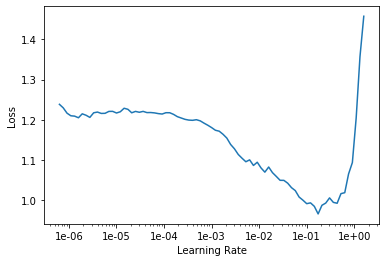

In [65]:
learn.recorder.plot()

In [66]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.668965,0.541137,0.782080,00:27


In [0]:
learn.save('first')

In [68]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.641392,0.502162,0.793470,00:33


In [0]:
learn.save('second')

In [70]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.543645,0.463362,0.822323,00:50


In [0]:
learn.unfreeze()
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

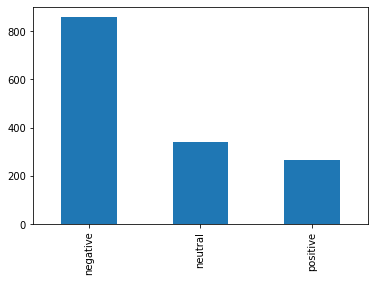

In [71]:
test_df = pd.read_csv("Tweets_filtered_test.csv", encoding="utf-8")
test_df['airline_sentiment'].value_counts().plot(kind='bar')

In [0]:
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,roc_curve,precision_recall_curve,precision_score,recall_score

In [74]:
test_df['pred_sentiment'] = test_df['text'].apply(lambda row: str(learn.predict(row)[0]))
print("Test Accuracy: ", accuracy_score(test_df['airline_sentiment'], test_df['pred_sentiment']))

Test Accuracy:  0.796448087431694
